This notebook demonstrates the process of model fitting using the popular Iris flower dataset.

In [1]:
import numpy as np

# load data
X = np.loadtxt('iris.data', delimiter=',', usecols=[0,1,2,3], dtype=float)
y = np.loadtxt('iris.data', delimiter=',', usecols=[4], dtype=str)

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# convert labels
y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int32)

### (1) Splitting up Dataset

Split up the data into three parts: training set, validation set, and test set

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

### (2) Fit Model

See https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### (3) Model Evaluation

Let us use the test set to assess the quality of the model

In [4]:
from sklearn.metrics import accuracy_score

# get predictions for test set
preds = model.predict(X_test)

final_accuracy = accuracy_score(y_test, preds)
print("Accuracy on test set: {}".format(final_accuracy))

Accuracy on test set: 0.9466666666666667


In addition to the accuracy, one can also plot a so-called confusion matrix.

Text(0.5, 1.0, 'Confusion Matrix (kNN Classifier)')

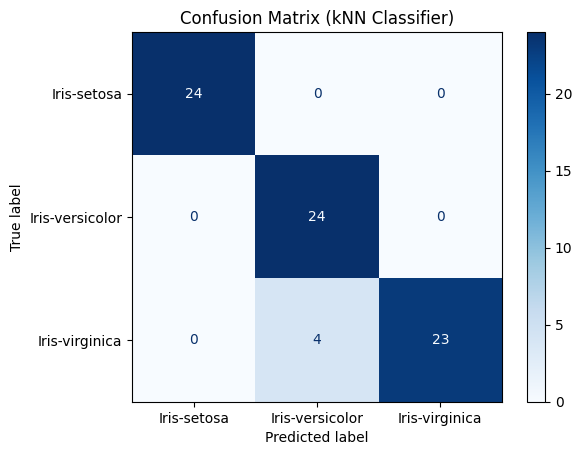

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=target_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion Matrix (kNN Classifier)")

In [6]:
# Next question: How can we pick a good value for the number of nearest neighbors?